**ルール**

- 基本的に自分のトグル内で開発してください

- 他人のコードの拝見は大歓迎です。

github 管理を採用しました。

簡単なモデル実装、解析、は各々のcolabでできます。
本格的な学習、GPUをたくさん回したい場合はPRでコメントしていただけると、自分がマージしてモデルを学習、提出します。結果は逐一報告しときます。

# github連携関連

In [4]:
# 1. Google Driveをマウント（Kaggle.jsonや設定ファイルの保存に推奨）
from google.colab import drive
drive.mount('/content/drive')

# 2. PATを安全に入力
import getpass
# 実行すると入力ボックスが表示されるので、GitHubで取得したPATを入力してください
github_token = getpass.getpass('Enter GitHub Personal Access Token (PAT): ')

# 3. リポジトリURLの準備
# この形式でPATを使って認証します。
github_repo_url = f"https://{github_token}@github.com/taisei173263/kaggle_biomass.git"

# 4. リポジトリをクローン
# Colabのホームディレクトリにリポジトリがダウンロードされます
!git clone {github_repo_url}

# 5. 作業ディレクトリをリポジトリフォルダに移動
# 以降の作業はこのフォルダ内で行われます
%cd kaggle_biomass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter GitHub Personal Access Token (PAT): ··········
Cloning into 'kaggle_biomass'...
/content/kaggle_biomass


In [5]:
# 1. ユーザー名とメールアドレスを設定
# ここはGitHubで使っている正確なユーザー名とメールアドレスに置き換えてください
!git config user.email "yingyongjichu@gmail.com"
!git config user.name "taisei173263"

In [6]:
# 1. フォルダ内の全ての変更（新しいノートブックを含む）をステージング
!git add .

# 2. 変更をコミット
# -m の後に、意味のあるコミットメッセージを記述してください
!git commit -m "feat: Initial commit of the main Colab notebook"

# 3. GitHubへプッシュ
!git push origin main

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/taisei173263/kaggle_biomass.git'


# データタウンロード、環境構築関連(できれば変えないで欲しいpathはいいよ)

In [3]:
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# 指定されたデータ格納ディレクトリ
DATA_DIR = '/content/drive/MyDrive/kaggle/Grass'

# 必須ライブラリのインストール（すでにあっても問題なし）
!pip install -q kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
"""

import os
import json
from google.colab import userdata

# 1. Colab Secretsから認証情報を取得
try:
    # シークレット名: taiseitsuneki をKaggleのユーザー名として使用
    USERNAME = 'taiseitsuneki'
    # シークレット値: f1bfea64f37fca4151af9aea8011e1bc をAPIキーとして使用
    API_KEY = userdata.get(USERNAME)

    if not API_KEY:
        raise ValueError("シークレット値が空です。")

    print(f"✅ Colab Secretsからユーザー名 '{USERNAME}' と APIキーを取得しました。")

except Exception as e:
    print(f"⚠️ 致命的なエラー: シークレット '{USERNAME}' の取得に失敗しました。Colab Secretsの『ノートブックからのアクセス』を確認してください。")
    # エラーが発生した場合は、ここで処理を停止します。
    raise

# 2. kaggle.json ファイルを作成するための認証情報データ
kaggle_data = {
    "username": USERNAME,
    "key": API_KEY
}

# 3. .kaggle ディレクトリが存在しない場合は作成
KAGGLE_DIR = os.path.expanduser('~/.kaggle')
!mkdir -p "$KAGGLE_DIR"

# 4. kaggle.json ファイルを正しいパスに書き込み
kaggle_json_path = os.path.join(KAGGLE_DIR, 'kaggle.json')
with open(kaggle_json_path, 'w') as f:
    json.dump(kaggle_data, f)

# 5. ファイルのパーミッションを設定 (セキュリティ上の必須手順)
!chmod 600 "$kaggle_json_path"

print(f"✅ 認証ファイル {kaggle_json_path} の作成と配置が完了しました。")

✅ Colab Secretsからユーザー名 'taiseitsuneki' と APIキーを取得しました。
✅ 認証ファイル /root/.kaggle/kaggle.json の作成と配置が完了しました。


In [17]:

"""
import zipfile

# データ格納ディレクトリが存在しない場合は作成
!mkdir -p "$DATA_DIR"

print(f"📥 Kaggleデータダウンロード開始: {DATA_DIR}")

# ダウンロード実行
!kaggle competitions download -c csiro-biomass -p "$DATA_DIR" -q

print("✅ データダウンロードコマンド実行完了。")

# --- ファイルの解凍 ---
# DATA_DIR内のすべてのzipファイルを取得
zip_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.zip')]

if not zip_files:
    print("⚠️ 注意: ZIPファイルが見つかりませんでした。データが空の可能性がありますが、認証エラーは解消しているはずです。")
else:
    for zip_file in zip_files:
        zip_path = os.path.join(DATA_DIR, zip_file)
        print(f"📂 {zip_file} を解凍中...")
        with zipfile.ZipFile(zip_path, 'r') as zf:
            zf.extractall(DATA_DIR)

        # 解凍後のzipファイルは削除（任意）
        os.remove(zip_path)

    print("✅ 全てのファイルの解凍と整理が完了しました。")

# 最終的なファイルリストを確認
print("\n最終的なファイルリスト:")
!ls -l "$DATA_DIR"

📥 Kaggleデータダウンロード開始: /content/drive/MyDrive/kaggle/Grass
User cancelled operation
✅ データダウンロードコマンド実行完了。
⚠️ 注意: ZIPファイルが見つかりませんでした。データが空の可能性がありますが、認証エラーは解消しているはずです。

最終的なファイルリスト:
total 187
-rw------- 1 root root    161 Dec  9 07:33 sample_submission.csv
drwx------ 2 root root   4096 Dec  9 07:33 test
-rw------- 1 root root    321 Dec  9 07:33 test.csv
drwx------ 2 root root   4096 Dec  9 07:33 train
-rw------- 1 root root 181910 Dec  9 07:33 train.csv


# 常木の開発トグル

## EDA 探索的データ解析

stap1 基本統計量とデータ歪みの確認

--- ターゲット変数の欠損値と基本統計量 ---
target_name  Dry_Green_g  Dry_Dead_g  Dry_Clover_g       GDM_g  Dry_Total_g
count         357.000000  357.000000    357.000000  357.000000   357.000000
mean           26.624722   12.044548      6.649692   33.274414    45.318097
std            25.401232   12.402007     12.117761   24.935822    27.984015
min             0.000000    0.000000      0.000000    1.040000     1.040000
25%             8.800000    3.200000      0.000000   16.026100    25.271500
50%            20.800000    7.980900      1.423500   27.108200    40.300000
75%            35.083400   17.637800      7.242900   43.675700    57.880000
max           157.983600   83.840700     71.786500  157.983600   185.700000


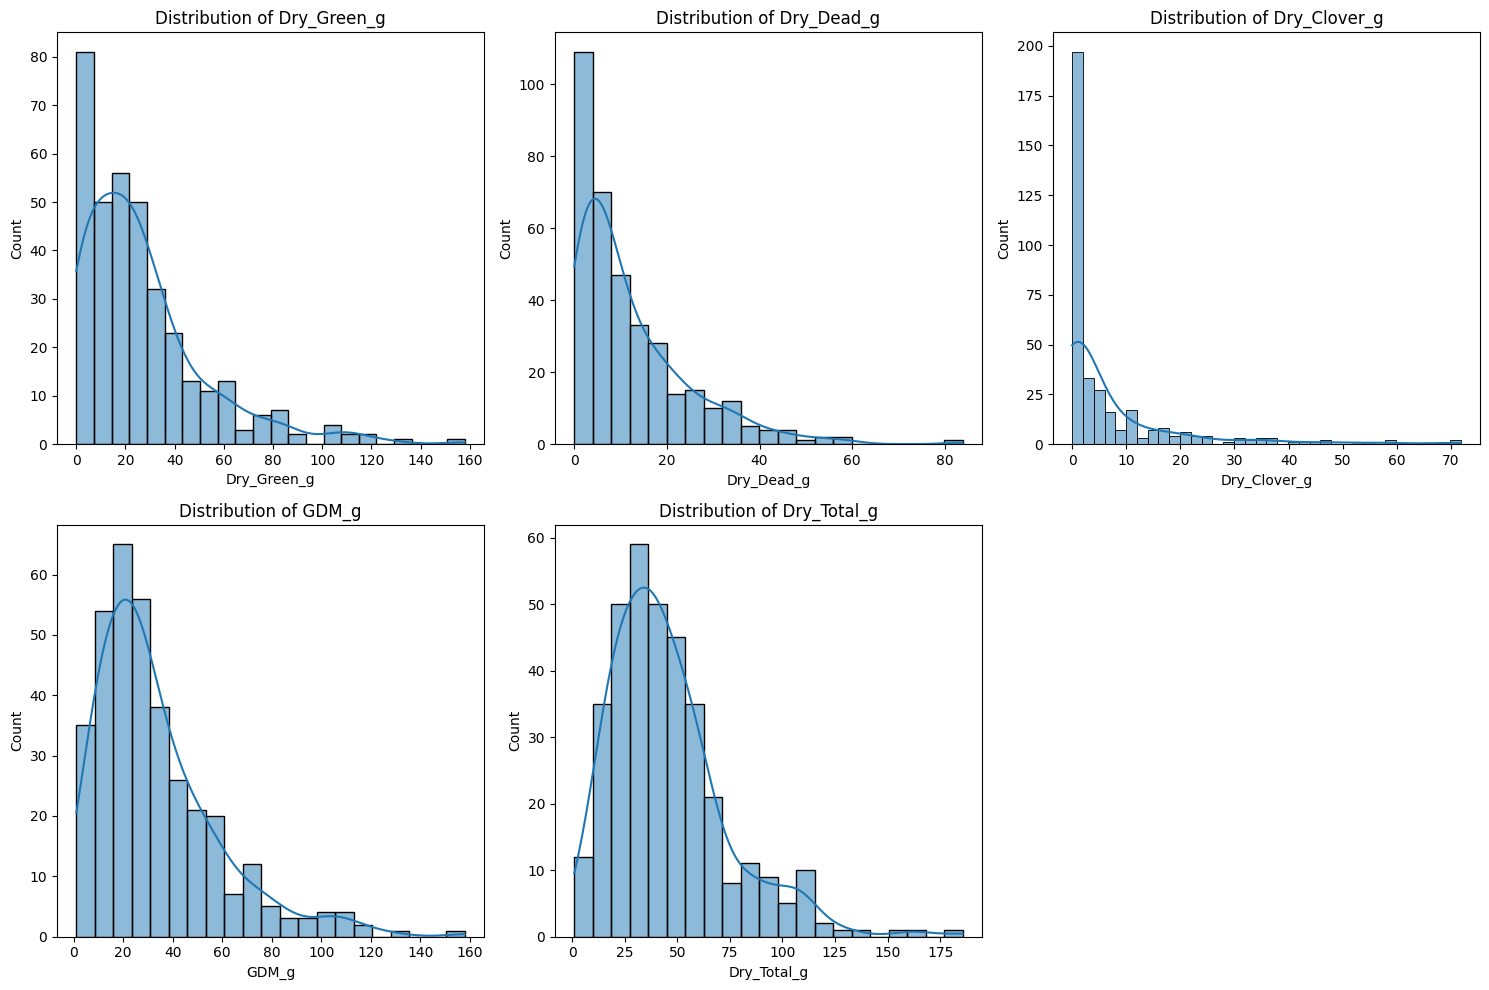

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# パスの設定
DATA_DIR = '/content/drive/MyDrive/kaggle/Grass'
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))

# 1. ターゲットの種類ごとにデータを分離して統計量を確認
targets = ['Dry_Green_g', 'Dry_Dead_g', 'Dry_Clover_g', 'GDM_g', 'Dry_Total_g']

print("--- ターゲット変数の欠損値と基本統計量 ---")
# 縦持ちデータを横持ち(Pivot)に変換して相関を見やすくする
pivot_df = train_df.pivot(index='sample_id', columns='target_name', values='target').reset_index()
print(pivot_df[targets].describe())

# 2. ターゲットの分布を確認（可視化）
plt.figure(figsize=(15, 10))
for i, target in enumerate(targets):
    plt.subplot(2, 3, i+1)
    sns.histplot(pivot_df[target].dropna(), kde=True)
    plt.title(f'Distribution of {target}')
plt.tight_layout()
plt.show()

# 大附の開発カラム